In [28]:
using LinearAlgebra, SparseArrays, Plots

In [36]:
n = 10
X = spdiagm(-1 => fill(0.5,n-1),1 => 1:n-1)
D = spdiagm(1 => 2*(1:n-1))
#eigvals(Matrix(X-D))
A  = X-D
A*A' - A'*A
B = A^2

10×10 SparseMatrixCSC{Float64, Int64} with 26 stored entries:
 -0.5     ⋅     2.0     ⋅      ⋅      ⋅      ⋅      ⋅      ⋅     ⋅ 
   ⋅    -1.5     ⋅     6.0     ⋅      ⋅      ⋅      ⋅      ⋅     ⋅ 
  0.25    ⋅    -2.5     ⋅    12.0     ⋅      ⋅      ⋅      ⋅     ⋅ 
   ⋅     0.25    ⋅    -3.5     ⋅    20.0     ⋅      ⋅      ⋅     ⋅ 
   ⋅      ⋅     0.25    ⋅    -4.5     ⋅    30.0     ⋅      ⋅     ⋅ 
   ⋅      ⋅      ⋅     0.25    ⋅    -5.5     ⋅    42.0     ⋅     ⋅ 
   ⋅      ⋅      ⋅      ⋅     0.25    ⋅    -6.5     ⋅    56.0    ⋅ 
   ⋅      ⋅      ⋅      ⋅      ⋅     0.25    ⋅    -7.5     ⋅   72.0
   ⋅      ⋅      ⋅      ⋅      ⋅      ⋅     0.25    ⋅    -8.5    ⋅ 
   ⋅      ⋅      ⋅      ⋅      ⋅      ⋅      ⋅     0.25    ⋅   -4.5

In [22]:
maximum(abs.(eigvals(Matrix(X-D))))

3.436159118837737

In [ ]:
evs = [];
nv = 10:104300
for n = nv
    X = spdiagm(-1 => fill(0.5,n-1),1 => 1:n-1)
    D = spdiagm(1 => 2*(1:n-1))
    evs = [evs;maximum(abs.(eigvals(Matrix(X-D))))]
end
Float64.(evs);

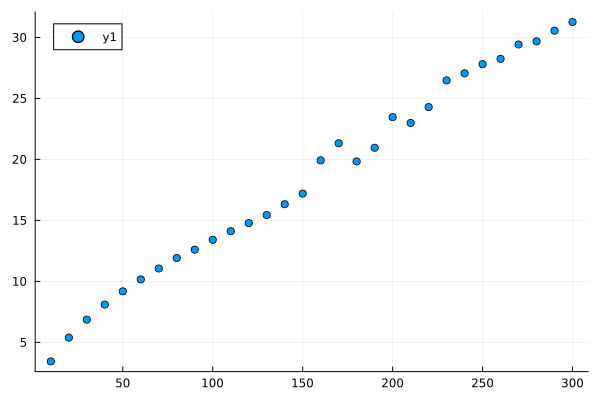

In [33]:
scatter(nv,evs)

In [4]:
?e

search: diagm spdiagm diag diagind Diagonal isdiag Bidiagonal Tridiagonal



```
diagm(kv::Pair{<:Integer,<:AbstractVector}...)
diagm(m::Integer, n::Integer, kv::Pair{<:Integer,<:AbstractVector}...)
```

Construct a matrix from `Pair`s of diagonals and vectors. Vector `kv.second` will be placed on the `kv.first` diagonal. By default the matrix is square and its size is inferred from `kv`, but a non-square size `m`×`n` (padded with zeros as needed) can be specified by passing `m,n` as the first arguments. For repeated diagonal indices `kv.first` the values in the corresponding vectors `kv.second` will be added.

`diagm` constructs a full matrix; if you want storage-efficient versions with fast arithmetic, see [`Diagonal`](@ref), [`Bidiagonal`](@ref) [`Tridiagonal`](@ref) and [`SymTridiagonal`](@ref).

# Examples

```jldoctest
julia> diagm(1 => [1,2,3])
4×4 Matrix{Int64}:
 0  1  0  0
 0  0  2  0
 0  0  0  3
 0  0  0  0

julia> diagm(1 => [1,2,3], -1 => [4,5])
4×4 Matrix{Int64}:
 0  1  0  0
 4  0  2  0
 0  5  0  3
 0  0  0  0

julia> diagm(1 => [1,2,3], 1 => [1,2,3])
4×4 Matrix{Int64}:
 0  2  0  0
 0  0  4  0
 0  0  0  6
 0  0  0  0
```

---

```
diagm(v::AbstractVector)
diagm(m::Integer, n::Integer, v::AbstractVector)
```

Construct a matrix with elements of the vector as diagonal elements. By default, the matrix is square and its size is given by `length(v)`, but a non-square size `m`×`n` can be specified by passing `m,n` as the first arguments.

# Examples

```jldoctest
julia> diagm([1,2,3])
3×3 Matrix{Int64}:
 1  0  0
 0  2  0
 0  0  3
```
